### Huggingface Datasets API

In [1]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"Number of datasets: {len(all_datasets)}")  
print(f"First 10: {all_datasets[:10]}")

/home/nurbot/anaconda3/envs/hf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_21759/1403481949.py:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


Number of datasets: 56604
First 10: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [2]:
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 58150.84 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [6]:
train_ds.column_names

['text', 'label']

In [7]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [8]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [9]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

### From Datasets to DataFrames


In [10]:
import pandas as pd

emotions.set_format("pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Visualize DataFrames

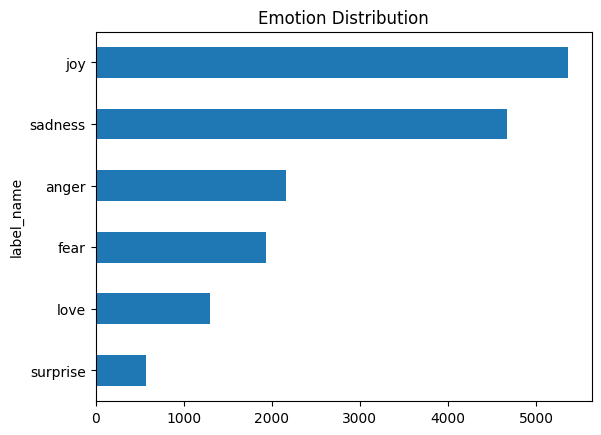

In [16]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Emotion Distribution")
plt.show()

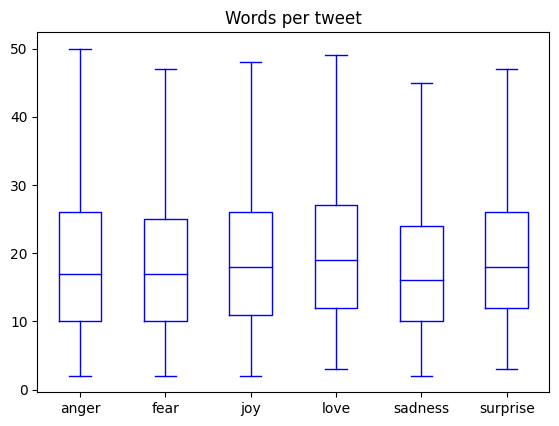

In [23]:
df["Words per tweet"] = df["text"].str.split().apply(len)
df.boxplot(column="Words per tweet", by="label_name", grid=False, showfliers=False, color="blue")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [24]:
# Reset format back to default
emotions.reset_format()

### From Text to Tokens
In the following blocks, we will tokenize using characters.

In [27]:
text = "Tokenizing is text is a core task of NLP."
tokenized_text = list(text)
tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 'i',
 's',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

Model expects numeric representation, need to apply numericalization.

In [28]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

Use token2idx to transform the tokenized text to a list of integers:

eg. 5 = T, 14 = o, .. etc.

In [29]:
input_ids = [token2idx[ch] for ch in tokenized_text]    
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 11,
 16,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [31]:
# One-hot vectors are often used in ML to encode categorical data, which can be either ordinal or nominal.
categorical_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron", "Starscream"], "Label ID": [0, 1, 2, 3]})
print(categorical_df)

# The problem is that they create fictious relationships between categories, e.g. Megatron is closer to Optimus Prime than to Starscream.
# Which can be problematic for some ML algorithms.
# We can solve this with a get_dummies() function from pandas.
pd.get_dummies(categorical_df["Name"])

            Name  Label ID
0      Bumblebee         0
1  Optimus Prime         1
2       Megatron         2
3     Starscream         3


,Bumblebee,Megatron,Optimus Prime,Starscream
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True


In [32]:
# We can create one-ot encodings in PyTorch by converting inputs_ids to a tensor and applying the one_hot() function.
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([41, 20])

In [33]:
# By examining the first vector we can see how a specific token is placed in the one-hot encoding.
print(f"Token: {tokenized_text[0]}")
print(f"Token ID: {input_ids[0]}")
print(f"One-hot encoding: {one_hot_encodings[0]}")

Token: T
Token ID: 5
One-hot encoding: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word tokenization

In [34]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'is', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

### Subword tokenization

Attempts to combine the best aspects of character and word tokenization. There are several subword tokenization algorithms that are commonly used in NLP, but let's start with WordPiece, which is used by BERT and DistilBERT tokenizers. Huggingface transformers provdes a convenient AutoTokenizer class that allows you to quickly load the tokenizer associated with a pretrained model. 

In [35]:
from transformers import AutoTokenizer
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Alternatively 
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_checkpoint)

In [36]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 2003, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [38]:
# convert back
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'is', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [39]:
# You can see special CLS and SEP tokens that have been added as well ## to mark subwords.
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing is text is a core task of nlp. [SEP]


In [40]:
tokenizer.vocab_size

30522

In [41]:
tokenizer.model_max_length

512

In [42]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### Tokenizing the whole dataset

In [43]:
# Applies tokenizer to a batch of examples, padding true adds examples with zeros and truncation true truncates examples to max context length.
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [44]:
tokenize(emotions["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [45]:
# apply the preprocessing function to all splits
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded["train"].column_names

Map: 100%|██████████| 2000/2000 [00:00<00:00, 24820.50 examples/s]


['text', 'label', 'input_ids', 'attention_mask']